# REAL ESTATE PRICE PREDICTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading in the file
data = pd.read_csv('Bengaluru_House_Data.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
data_2 = data.drop(['area_type','society','balcony','availability'],axis='columns')

In [4]:
data_2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [5]:
data_3 = data_2.dropna()
data_3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [6]:
data_3['bhk'] = data_3['size'].apply(lambda x:int(x.split(' ')[0]))

In [7]:
data_3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [8]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [11]:
data_3[data_3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [12]:
 # convert square-feet to numerical var
 def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return ( float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [13]:
data_4 = data_3.copy()
data_4['total_sqft']=data_4['total_sqft'].apply(convert_sqft_to_num)
data_4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [14]:
data_4.dtypes

location       object
size           object
total_sqft    float64
bath          float64
price         float64
bhk             int64
dtype: object

In [15]:
data_5 = data_4.copy()
data_5['price_per_sqft'] = data_5['price']*10000/data_5['total_sqft']
data_5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000


In [16]:
data_5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [17]:
location_stats = data_5.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [18]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Dodsworth Layout         10
1st Block Koramangala    10
Nagappa Reddy Layout     10
Ganga Nagar              10
Dairy Circle             10
                         ..
 Banaswadi                1
Kanakadasa Layout         1
Kanakapur main road       1
Kanakapura  Rod           1
whitefiled                1
Name: location, Length: 1063, dtype: int64

In [19]:
data_5.location = data_5.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)

In [20]:
data_5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,324.786325
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,746.705710
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,1818.181818
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,482.824427
9,other,6 Bedroom,1020.0,6.0,370.00,6,3627.450980


In [21]:
data_5[data_5.total_sqft/data_5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,3627.450980
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,3333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,1066.098081
68,other,8 Bedroom,1350.0,7.0,85.0,8,629.629630
70,other,3 Bedroom,500.0,3.0,100.0,3,2000.000000


In [22]:
data_5.shape

(13246, 7)

In [23]:
data_6 = data_5[~(data_5.total_sqft/data_5.bhk<300)]

In [24]:
data_6.shape

(12502, 7)

In [25]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out    

In [26]:
data_7 = remove_pps_outliers(data_6)

In [27]:
data_7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Devarachikkanahalli,3 BHK,1250.0,2.0,44.0,3,352.000000
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,320.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,691.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,341.880342
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,456.140351


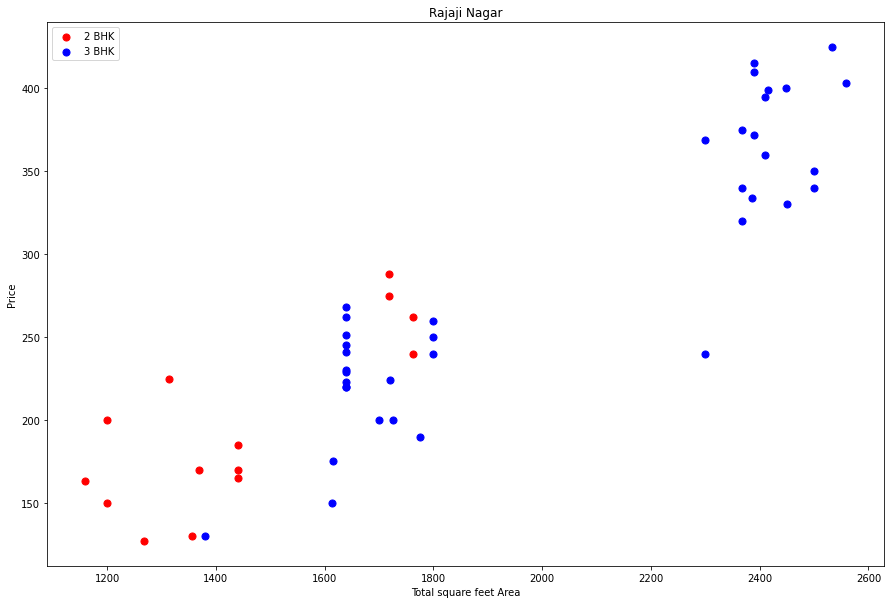

In [28]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.bhk==2)]
    bhk3 = df[(df.location == location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='red',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='blue',label='3 BHK',s=50)
    plt.xlabel('Total square feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    

plot_scatter_chart(data_7,'Rajaji Nagar')

In [29]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')               

In [30]:
data_8 = remove_bhk_outliers(data_7)
data_8.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,320.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,691.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,341.880342
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,456.140351
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2,454.065470


In [31]:
data_8[data_8.bath > data_8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,325.203252
5232,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,642.857143
6702,Thanisandra,3 BHK,1806.0,6.0,116.0,3,642.303433
8405,other,6 BHK,11338.0,9.0,1000.0,6,881.989769


In [32]:
data_9 = data_8[data_8.bath<data_8.bhk+2]

In [33]:
data_9.shape

(7264, 7)

In [34]:
data_10 = data_9.drop(['size','price_per_sqft'],axis='columns')
data_10.head()

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


In [35]:
dummies = pd.get_dummies(data_10.location)
dummies

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
data_11 = pd.concat([data_10,dummies.drop('other',axis='columns')],axis='columns')
data_11.head()

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
data_12 = data_11.drop('location',axis='columns')
data_12.head()

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,43.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
x = data_12.drop('price',axis='columns')
x.head()

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
y = data_12.price
y.head()

1    40.0
2    83.0
3    40.0
4    65.0
5    43.0
Name: price, dtype: float64

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=10,test_size=0.2)

In [41]:
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.769622492782053

In [42]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.82622151, 0.81408431, 0.87757267, 0.84822717, 0.86091226])

In [43]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [44]:
dtr_clf = DecisionTreeRegressor()
dtr_clf.fit(x_train,y_train)
dtr_clf.score(x_test,y_test)

0.7030231081352417

In [45]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(DecisionTreeRegressor(),x,y,cv=cv)

array([0.77027056, 0.62004054, 0.79003367, 0.66171856, 0.56998281])

In [46]:
lasso_clf = Lasso()
lasso_clf.fit(x_train,y_train)
lasso_clf.score(x_test,y_test)

0.6270506436228853

In [47]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(Lasso(),x,y,cv=cv)

array([0.67317935, 0.68622949, 0.73304242, 0.73053469, 0.72456822])

In [48]:
# Finding the best model score by using Grid search cv an shuffle split
# Defining the find_best_model function and passing in the dictionary containing the parameters to change.
def find_best_model(x,y):
        algos = {
            'linear_regression' : {
                'model':LinearRegression(),
                'params':{
                'normalize':[True,False]
                }
            },
            'lasso':{
                  'model':Lasso(),
                  'params':{
                  'alpha':[1,2],
                  'selection':['random','cyclic']
                }

            },
            'decision_tree':{
                  'model':DecisionTreeRegressor(),
                  'params':{
                  'criterion':['mse','friedman_mse'],
                      'splitter':['best','random']
                }
            }
        }
        scores = []
        cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
        for algo_name,config in algos.items():
            gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
            gs.fit(x,y)
            scores.append({
                'model':algo_name,
                'best_score':gs.best_score_,
                'best_params':gs.best_params_
            })
        return pd.DataFrame(scores,columns=['model','best_score','best_params'])
find_best_model(x,y)

,model,best_score,best_params
0,linear_regression,0.845404,{'normalize': False}
1,lasso,0.709629,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.686542,"{'criterion': 'mse', 'splitter': 'best'}"


In [49]:
# Testing out the models 
#1. LogisticRegression
def predict_price_lr(location,sqft,bath,bhk):
    loc_index = np.where(x.columns==location)[0][0]
    
    z = np.zeros(len(x.columns))
    z[0] = sqft
    z[1] = bath
    z[2] = bhk
    if loc_index >= 0:
        z[loc_index] = 1
        
    return lr_clf.predict([z])[0]    

In [50]:
# Testing out the models 
#1. DecisionTreeRegressor
def predict_price_dtr(location,sqft,bath,bhk):
    loc_index = np.where(x.columns==location)[0][0]
    
    z = np.zeros(len(x.columns))
    z[0] = sqft
    z[1] = bath
    z[2] = bhk
    if loc_index >= 0:
        z[loc_index] = 1
        
    return dtr_clf.predict([z])[0]  

In [51]:
# Testing out the models 
#3. Lasso
def predict_price_lasso(location,sqft,bath,bhk):
    loc_index = np.where(x.columns==location)[0][0]
    
    z = np.zeros(len(x.columns))
    z[0] = sqft
    z[1] = bath
    z[2] = bhk
    if loc_index >= 0:
        z[loc_index] = 1
        
    return lasso_clf.predict([z])[0]  

In [52]:
print(f"LinearRegression: {predict_price_lr('1st Phase JP Nagar',1000,2,2)}")
print(f"DecisionTreeRegressor: {predict_price_dtr('1st Phase JP Nagar',1000,2,2)}")
print(f"Lasso: {predict_price_lasso('1st Phase JP Nagar',1000,2,2)}")

LinearRegression: 88.92571491707753
DecisionTreeRegressor: 93.0
Lasso: 53.134793773147635


In [53]:
print(f"LinearRegression: {predict_price_lr('Indira Nagar',1000,5,3)}")
print(f"DecisionTreeRegressor: {predict_price_dtr('Indira Nagar',1000,5,3)}")
print(f"Lasso: {predict_price_lasso('Indira Nagar',1000,5,3)}")

LinearRegression: 194.67574489955993
DecisionTreeRegressor: 105.0
Lasso: 53.134793773147635


In [54]:
import pickle
with open('bangalore_home_prices_model_lr.pkl','wb') as f:
    pickle.dump(lr_clf,f)
    
with open('bangalore_home_prices_model_lr.pkl','rb') as f:
    model_lr_clf = pickle.load(f)

In [55]:
with open('bangalore_home_prices_model_dtr.pkl','wb') as f:
    pickle.dump(dtr_clf,f)
    
with open('bangalore_home_prices_model_dtr.pkl','rb') as f:
    model_dtr_clf = pickle.load(f)

In [56]:
with open('bangalore_home_prices_model_lasso.pkl','wb') as f:
    pickle.dump(lasso_clf,f)
    
with open('bangalore_home_prices_model_lasso.pkl','rb') as f:
    model_lasso_clf = pickle.load(f)

In [57]:
model_lr_clf

LinearRegression()